In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
file_path = "C:/Users/DELL/Downloads/Case_Study_Urgency_Message_Data.xlsx"
xls = pd.ExcelFile(file_path)
sheets = xls.sheet_names


# Combine all sheets into a single DataFrame
df_list = [xls.parse(sheet_name=sheet) for sheet in sheets]
df = pd.concat(df_list, ignore_index=True)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49064 entries, 0 to 49063
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   #                        49064 non-null  int64         
 1   ADR_USD                  49064 non-null  float64       
 2   hotel_id                 49064 non-null  int64         
 3   city_id                  49064 non-null  int64         
 4   star_rating              49064 non-null  float64       
 5   accommadation_type_name  27298 non-null  object        
 6   chain_hotel              49064 non-null  object        
 7   booking_date             49064 non-null  datetime64[ns]
 8   checkin_date             49064 non-null  datetime64[ns]
 9   checkout_date            49064 non-null  datetime64[ns]
 10  accommodation_type_name  21766 non-null  object        
dtypes: datetime64[ns](3), float64(2), int64(3), object(3)
memory usage: 4.1+ MB


In [29]:
df.head()

,#,ADR_USD,hotel_id,city_id,star_rating,accommadation_type_name,chain_hotel,booking_date,checkin_date,checkout_date,accommodation_type_name
0,1,71.06,297388,9395,2.5,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,NaN
1,2,76.56,298322,9395,3.0,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,NaN
2,3,153.88,2313076,9395,5.0,Hotel,chain,2016-08-02,2016-10-01,2016-10-02,NaN
3,4,126.60,2240838,9395,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,NaN
4,5,115.08,2240838,9395,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,NaN


In [30]:
# Handling missing values
missing_values = df.isnull().sum()
print("Missing Values in Dataset:")
print(missing_values[missing_values > 0])

Missing Values in Dataset:
accommadation_type_name    21766
accommodation_type_name    27298
dtype: int64


In [33]:
# Standardizing column names and merging duplicate data
df['accommodation_type_name'] = df['accommodation_type_name'].fillna(df['accommadation_type_name'])

In [34]:

missing_values = df.isnull().sum()
print("Missing Values in Dataset:")
print(missing_values[missing_values > 0])

Missing Values in Dataset:
accommadation_type_name    21766
dtype: int64


In [35]:
# Drop the incorrect column
df.drop(columns=['accommadation_type_name'], inplace=True)

In [36]:

missing_values = df.isnull().sum()
print("Missing Values in Dataset:")
print(missing_values[missing_values > 0])

Missing Values in Dataset:
Series([], dtype: int64)


In [37]:
# Fill or drop missing values based on business logic
df.dropna(inplace=True) 

In [38]:
# Convert date columns to datetime format
df['booking_date'] = pd.to_datetime(df['booking_date'])
df['checkin_date'] = pd.to_datetime(df['checkin_date'])
df['checkout_date'] = pd.to_datetime(df['checkout_date'])

In [39]:

# Creating a lead time column (Days between booking & check-in)
df['lead_time'] = (df['checkin_date'] - df['booking_date']).dt.days

In [40]:

# Categorizing bookers: Early (30+ days), Mid (15-29 days), Late (0-14 days)
df['booking_category'] = pd.cut(df['lead_time'], 
                                 bins=[-1, 14, 29, np.inf],
                                 labels=['Late', 'Mid', 'Early'])

In [41]:
df

,#,ADR_USD,hotel_id,city_id,star_rating,chain_hotel,booking_date,checkin_date,checkout_date,accommodation_type_name,lead_time,booking_category
0,1,71.060000,297388,9395,2.5,non-chain,2016-08-02,2016-10-01,2016-10-02,Hotel,60,Early
1,2,76.560000,298322,9395,3.0,non-chain,2016-08-02,2016-10-01,2016-10-02,Hotel,60,Early
2,3,153.880000,2313076,9395,5.0,chain,2016-08-02,2016-10-01,2016-10-02,Hotel,60,Early
3,4,126.600000,2240838,9395,3.5,non-chain,2016-08-04,2016-10-02,2016-10-03,Hotel,59,Early
4,5,115.080000,2240838,9395,3.5,non-chain,2016-08-04,2016-10-02,2016-10-03,Hotel,59,Early
...,...,...,...,...,...,...,...,...,...,...,...,...
49059,4813,72.580000,130890,8584,4.0,non-chain,2016-12-31,2016-12-31,2017-01-02,hotel,0,Late
49060,4814,70.020000,130890,8584,4.0,non-chain,2016-12-31,2016-12-31,2017-01-01,hotel,0,Late
49061,4815,921.260000,21720,8584,5.0,non-chain,2016-12-31,2016-12-31,2017-01-01,resort,0,Late
49062,4816,345.086667,21720,8584,5.0,non-chain,2016-12-31,2016-12-31,2017-01-03,resort,0,Late


In [42]:
# Calculate % of early, mid, and late bookers
booking_distribution = df['booking_category'].value_counts(normalize=True) * 100
print("Booking Distribution:")
print(booking_distribution)

Booking Distribution:
booking_category
Late     62.697458
Mid      19.078290
Early    18.224251
Name: proportion, dtype: float64


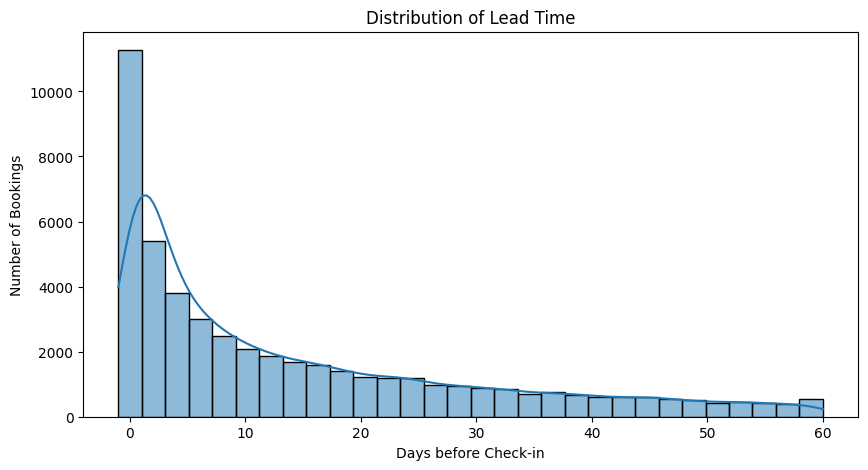

In [43]:
# Plot distribution of lead times
plt.figure(figsize=(10,5))
sns.histplot(df['lead_time'], bins=30, kde=True)
plt.title('Distribution of Lead Time')
plt.xlabel('Days before Check-in')
plt.ylabel('Number of Bookings')
plt.show()

In [44]:
# ADR Trends by Booking Category
# Differentiating natural price changes vs. promotional discounts
print("\nChecking if last-minute bookings have lower prices (potential discounts):")
adr_trends = df.groupby('booking_category')['ADR_USD'].mean()
print("ADR by Booking Category:")
print(adr_trends)

ADR by Booking Category:
booking_category
Late     137.108580
Mid      163.396293
Early    169.862692
Name: ADR_USD, dtype: float64


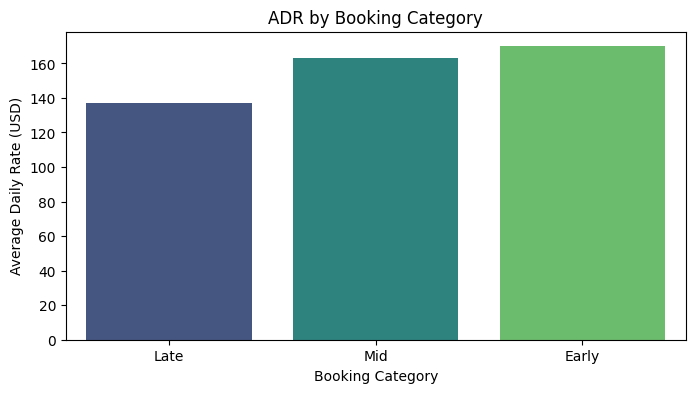

In [45]:
# Plot ADR by booking category
plt.figure(figsize=(8, 4))
sns.barplot(x=adr_trends.index, y=adr_trends.values, palette='viridis')
plt.title('ADR by Booking Category')
plt.ylabel('Average Daily Rate (USD)')
plt.xlabel('Booking Category')
plt.show()



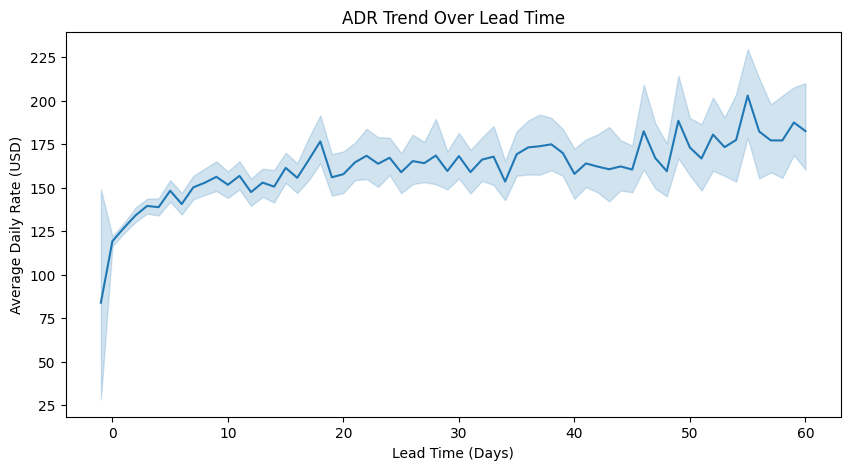

In [46]:
# ADR trend over lead time
# Checking if prices actually increase over time
plt.figure(figsize=(10,5))
sns.lineplot(x=df['lead_time'], y=df['ADR_USD'])
plt.title('ADR Trend Over Lead Time')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Average Daily Rate (USD)')
plt.show()

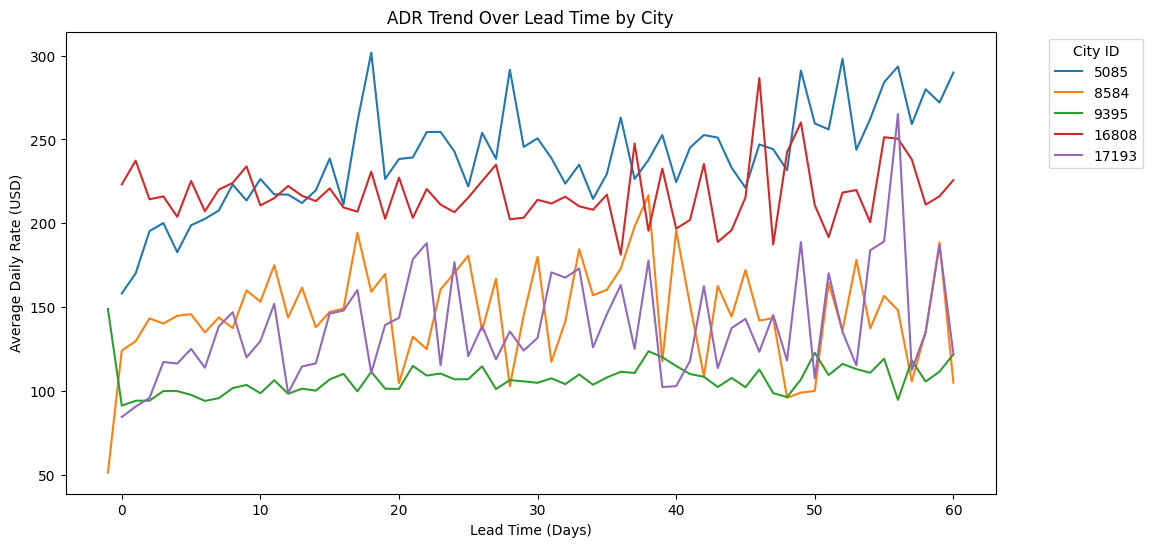

In [47]:
# ADR trend over lead time segmented by city 
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='lead_time', y='ADR_USD', hue='city_id', palette='tab10', ci=None)
plt.title('ADR Trend Over Lead Time by City')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Average Daily Rate (USD)')
plt.legend(title='City ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


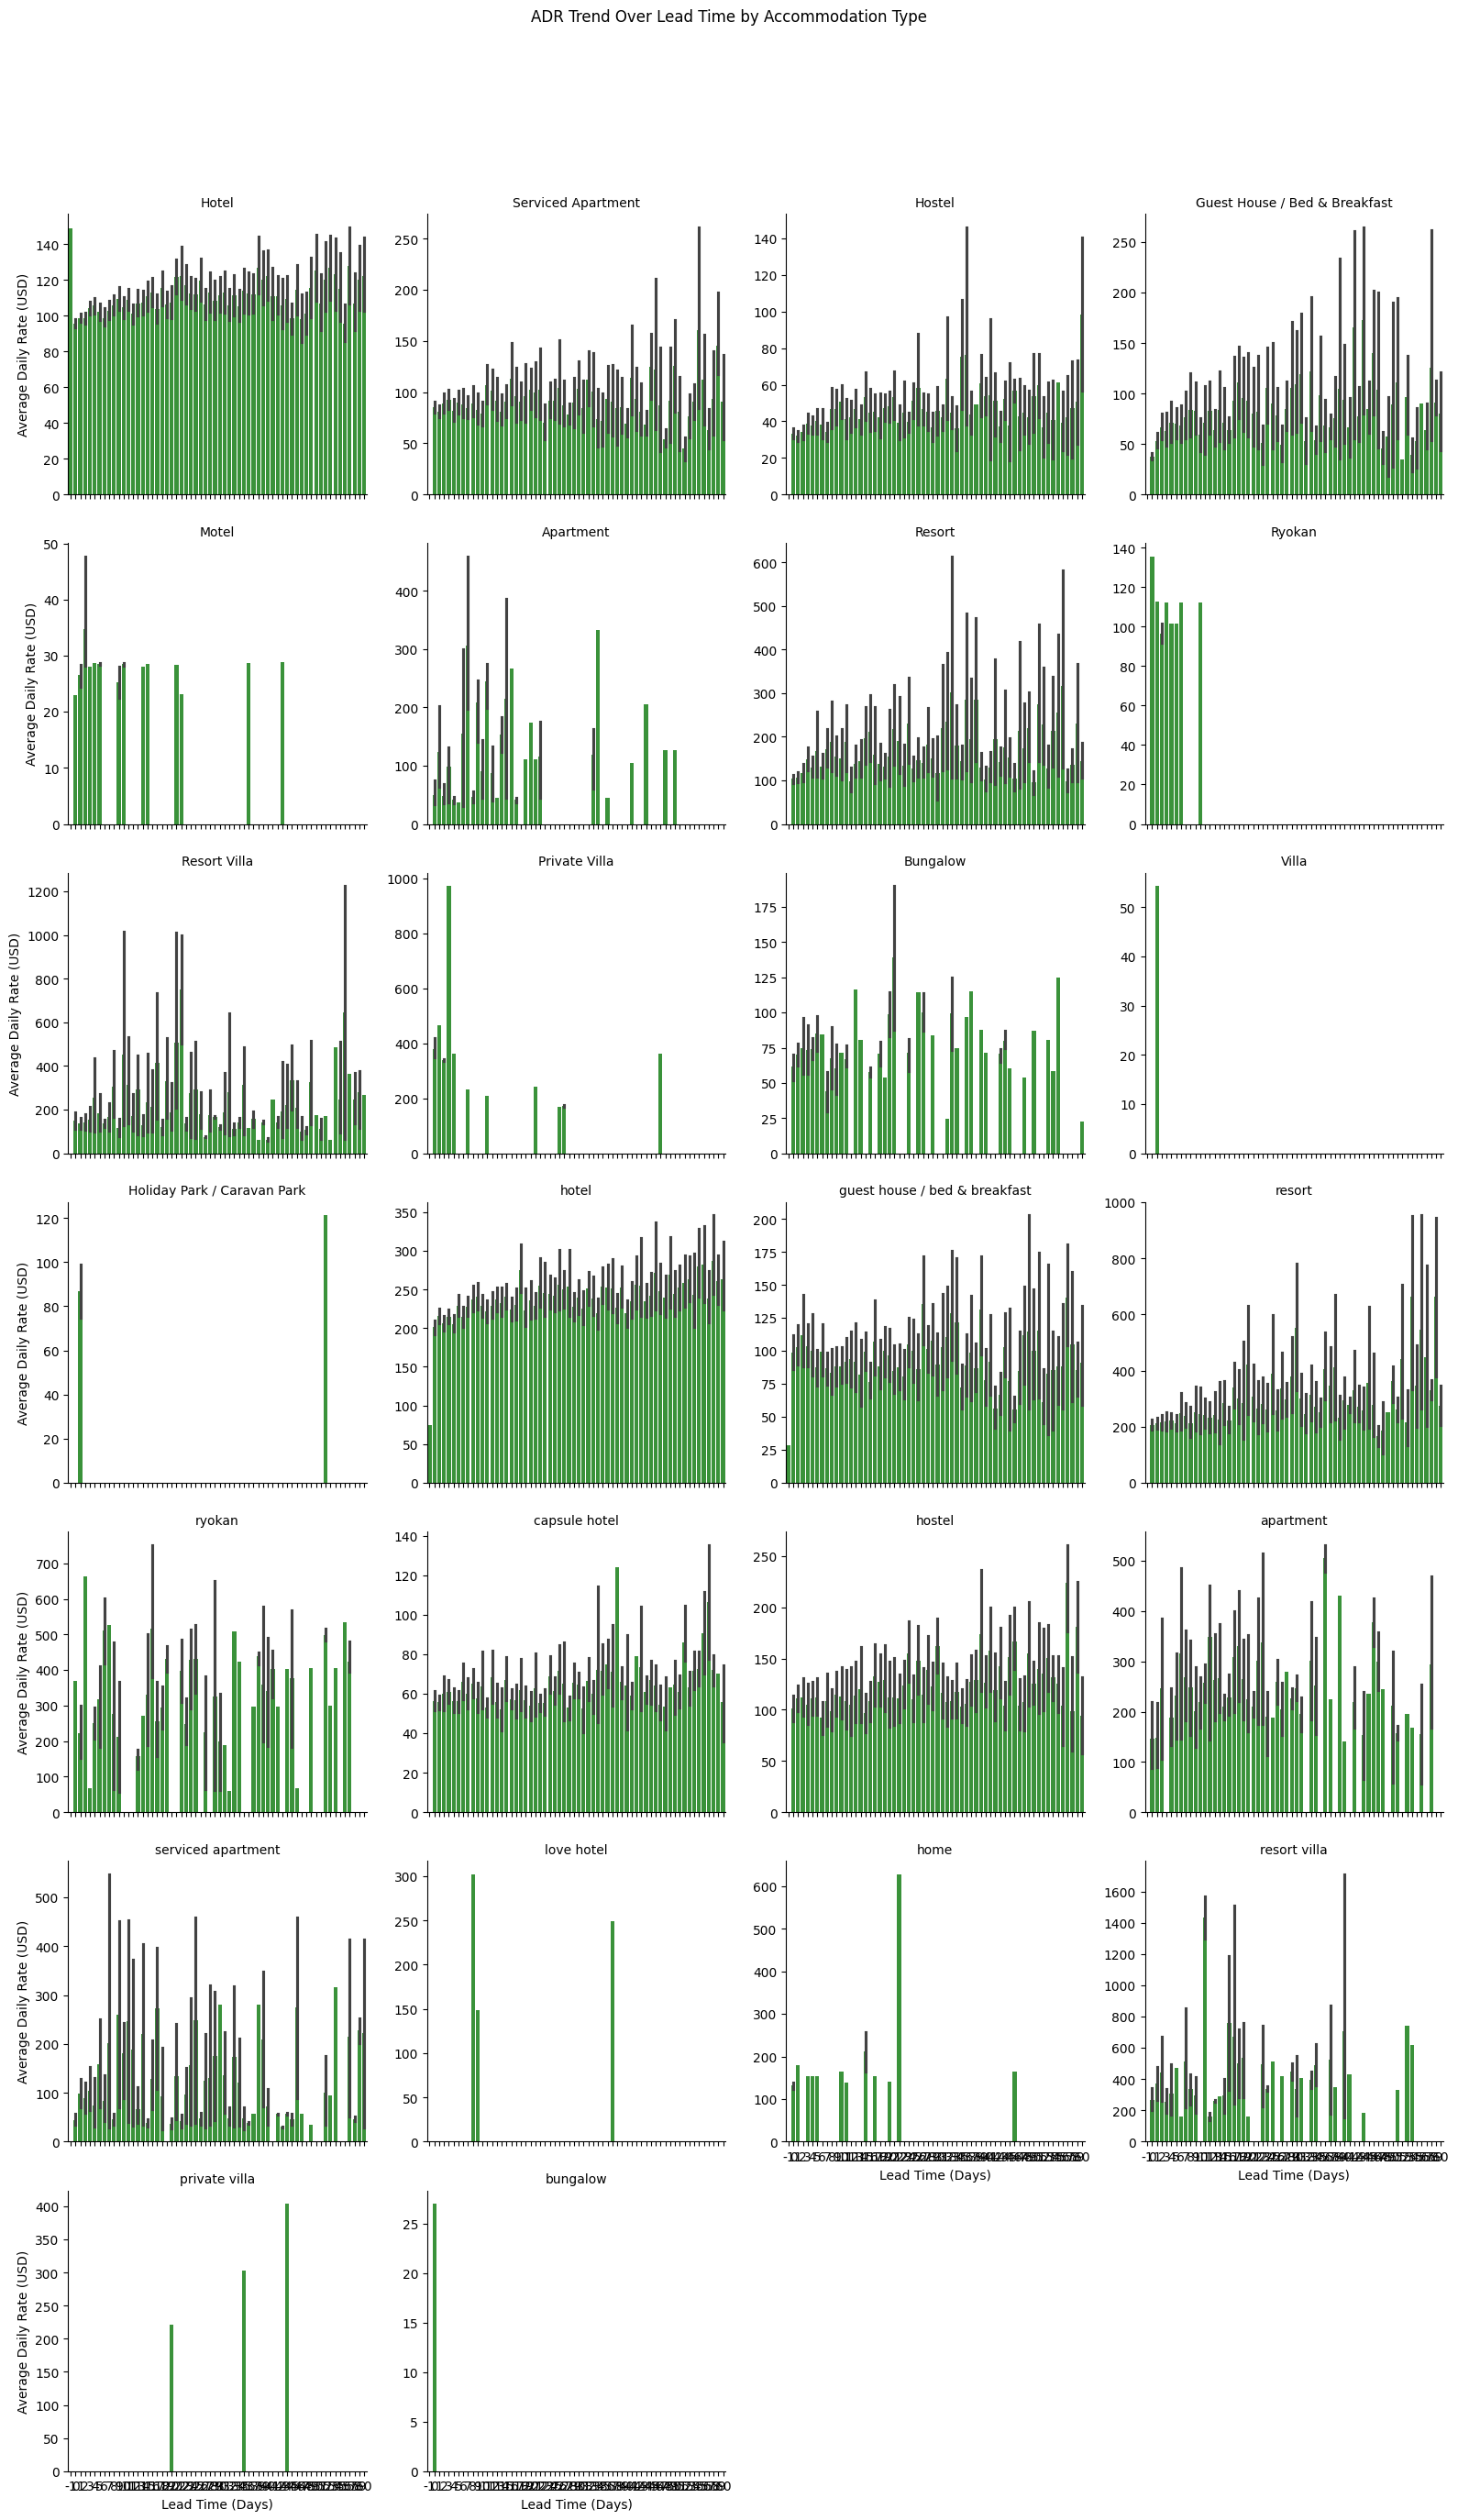

In [48]:
# Facet Grid for ADR by lead time and Accommodation Type
g = sns.FacetGrid(df, col="accommodation_type_name", col_wrap=4, height=4, sharey=False)
g.map(sns.barplot, 'lead_time', 'ADR_USD', color='tab:green')
g.set_axis_labels("Lead Time (Days)", "Average Daily Rate (USD)")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('ADR Trend Over Lead Time by Accommodation Type')
plt.show()

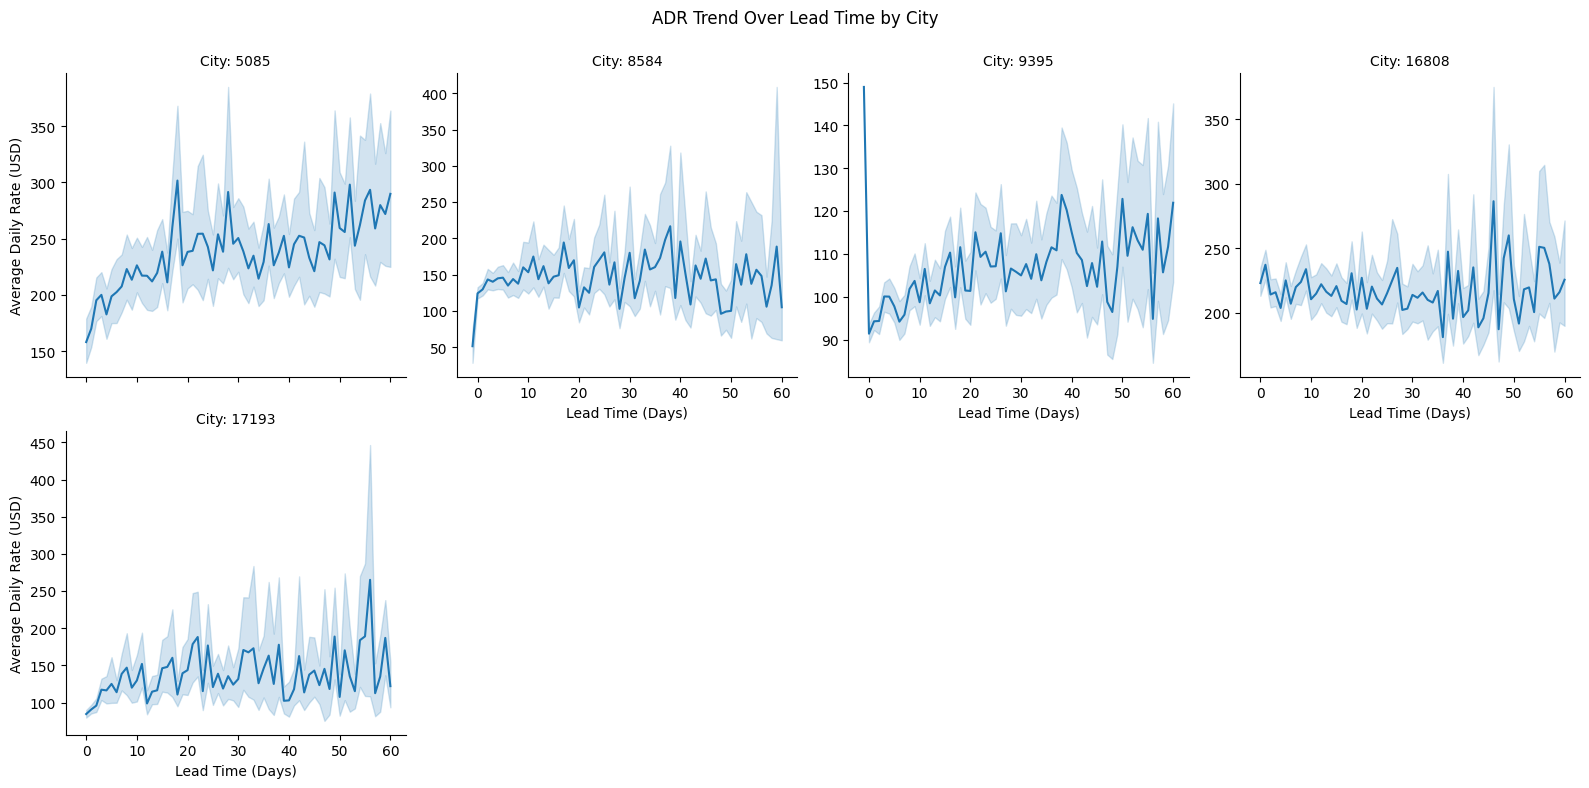

In [49]:

# Facet Grid for ADR by lead time and City ID
g = sns.FacetGrid(df, col="city_id", col_wrap=4, height=4, sharey=False)
g.map(sns.lineplot, 'lead_time', 'ADR_USD', color='tab:blue')
g.set_axis_labels("Lead Time (Days)", "Average Daily Rate (USD)")
g.set_titles("City: {col_name}")  # Adjusting title format for clarity
plt.subplots_adjust(top=0.9)
g.fig.suptitle('ADR Trend Over Lead Time by City')
plt.show()


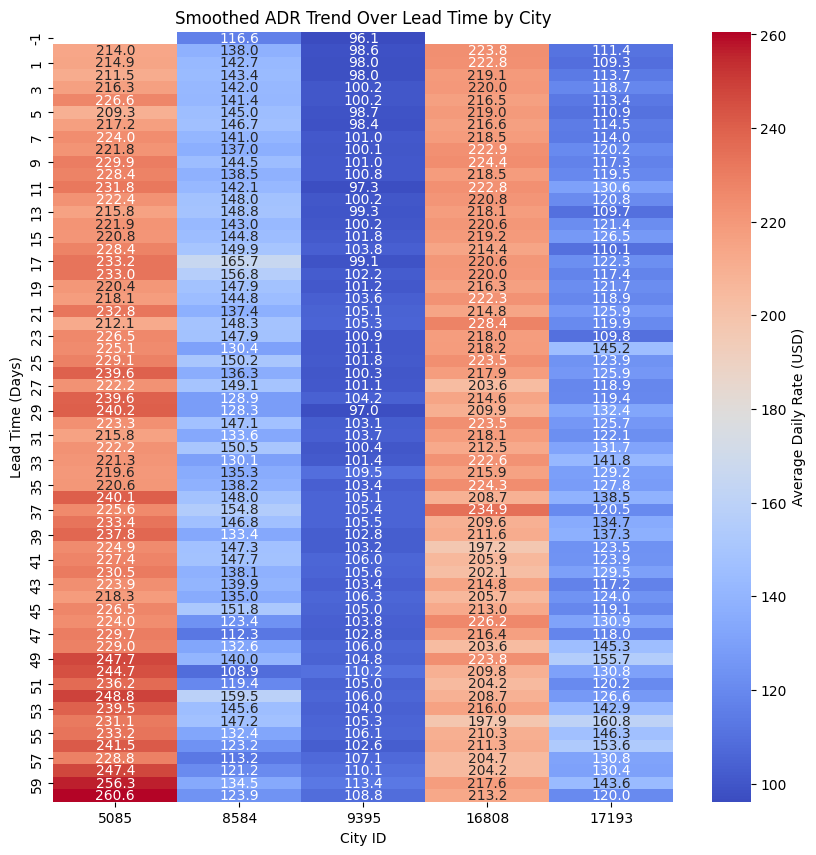

In [50]:
# Apply rolling average to smooth the data (e.g., 7-day moving average)
df['ADR_smooth'] = df.groupby('city_id')['ADR_USD'].rolling(7).mean().reset_index(level=0, drop=True)

# Pivot data for a smoothed heatmap visualization
adr_by_city_smooth = df.pivot_table(index='lead_time', columns='city_id', values='ADR_smooth', aggfunc='mean')

# Heatmap for smoothed ADR by City ID over lead time
plt.figure(figsize=(10,10))
sns.heatmap(adr_by_city_smooth, cmap='coolwarm', annot=True, fmt='.1f', cbar_kws={'label': 'Average Daily Rate (USD)'})
plt.title('Smoothed ADR Trend Over Lead Time by City')
plt.xlabel('City ID')
plt.ylabel('Lead Time (Days)')
plt.show()


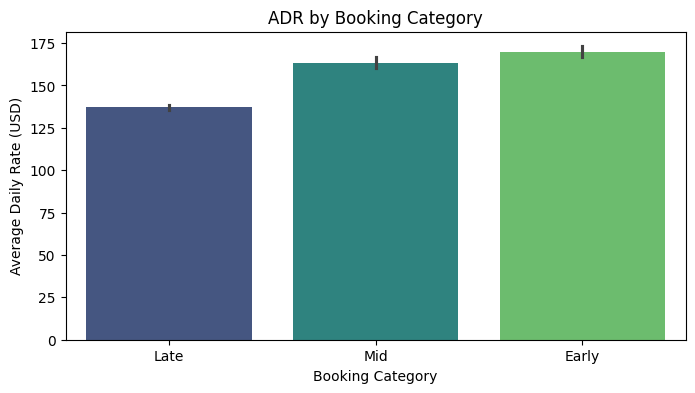

In [51]:
# Plot ADR by booking category
# Price trends by booking window
plt.figure(figsize=(8, 4))
sns.barplot(x='booking_category', y='ADR_USD', data = df, palette='viridis') 
plt.title('ADR by Booking Category')
plt.ylabel('Average Daily Rate (USD)')
plt.xlabel('Booking Category')
plt.show()

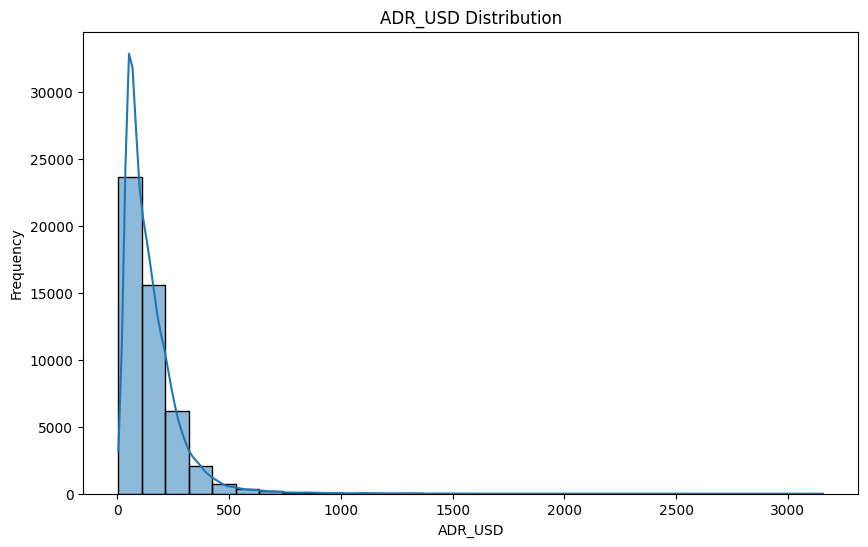

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(df['ADR_USD'], kde=True, bins=30)
plt.title('ADR_USD Distribution')
plt.xlabel('ADR_USD')
plt.ylabel('Frequency')
plt.show()

In [53]:
df['month'] = df['checkin_date'].dt.month
df.head()


,#,ADR_USD,hotel_id,city_id,star_rating,chain_hotel,booking_date,checkin_date,checkout_date,accommodation_type_name,lead_time,booking_category,ADR_smooth,month
0,1,71.06,297388,9395,2.5,non-chain,2016-08-02,2016-10-01,2016-10-02,Hotel,60,Early,NaN,10
1,2,76.56,298322,9395,3.0,non-chain,2016-08-02,2016-10-01,2016-10-02,Hotel,60,Early,NaN,10
2,3,153.88,2313076,9395,5.0,chain,2016-08-02,2016-10-01,2016-10-02,Hotel,60,Early,NaN,10
3,4,126.60,2240838,9395,3.5,non-chain,2016-08-04,2016-10-02,2016-10-03,Hotel,59,Early,NaN,10
4,5,115.08,2240838,9395,3.5,non-chain,2016-08-04,2016-10-02,2016-10-03,Hotel,59,Early,NaN,10


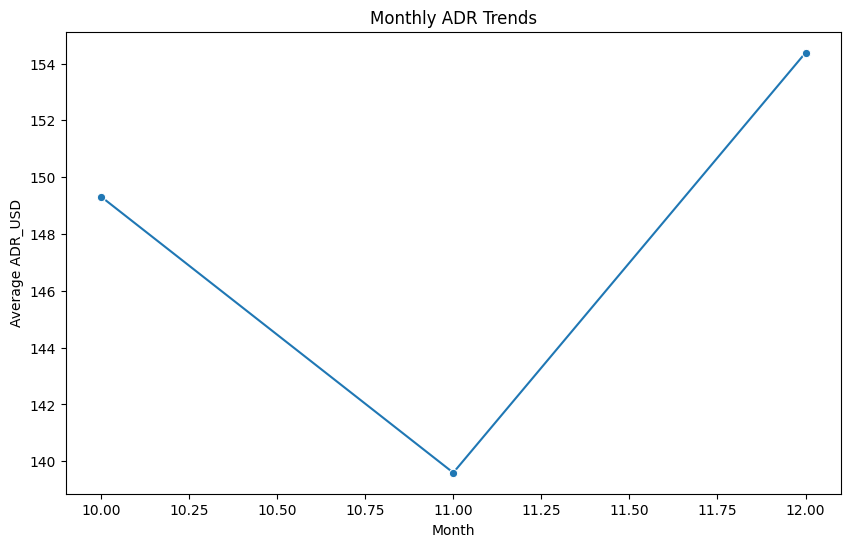

In [54]:
# Price trends by seasonality (Extracting Month from Check-in Date)monthly_adr = df.groupby('month')['ADR_USD'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='ADR_USD', data=monthly_adr, marker='o')
plt.title('Monthly ADR Trends')
plt.xlabel('Month')
plt.ylabel('Average ADR_USD')
plt.show()

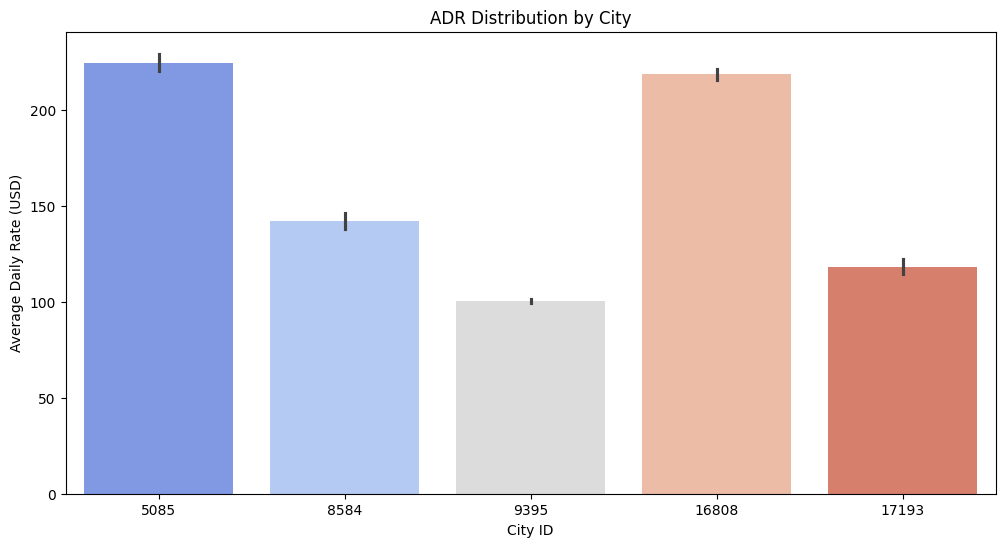

In [56]:
# Identifying Key Factors Influencing Price Changes

# Price trends by city
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='city_id', y='ADR_USD', palette='coolwarm')
plt.title('ADR Distribution by City')
plt.xlabel('City ID')
plt.ylabel('Average Daily Rate (USD)')
plt.show()

In [64]:
# A/B Testing Experiment Design
print("\nA/B Testing Strategy:")
print("Control Group: No urgency message displayed")
print("Test Group: Urgency message displayed")
print("Metrics to Measure: Conversion Rate, Click-through Rate, Booking Time Reduction")


A/B Testing Strategy:
Control Group: No urgency message displayed
Test Group: Urgency message displayed
Metrics to Measure: Conversion Rate, Click-through Rate, Booking Time Reduction
